# Homework 1 solutions

## 1. 

### a)  
This problem is from [one of my papers](https://arxiv.org/abs/2212.06924) (see Section 4). The relative condition number with respect to $x$ is

$$ \kappa_x = \left| \frac{x f_{\omega_0}'(x)}{f_{\omega_0}(x)} \right| = |i\omega_0\Omega(x)| = |i\omega(x)|, $$

whereas with respect to $\omega_0$ it is (replace $x$ with $\omega_0$ as the input parameter)

$$ \kappa_{\omega_0} = \left| \frac{\omega_0 \frac{\partial f_{\omega_0}(x)}{\partial \omega_0}}{f_{\omega_0}(x)} \right|
= \left| i\omega_0 \int_{x_0}^x \Omega(\sigma) \mathrm{d} \sigma \right| = \left| i\int_{x_0}^x \omega(\sigma) \mathrm{d} \sigma \right|. $$

This latter quantity is what appears in the exponent of the oscillatory function $f_{\omega_0}(x)$, making it the _total phase_ of the oscillator (assuming its frequency is real).

Always think about what the answer means _physically_, as this will help you build intuition. When I ask for an interpretation, I don't mean the definition, but something a little deeper.

### b) 
Both b) and c) are problems taken from [Fundamentals of Numerical Computation](https://tobydriscoll.net/fnc-julia/intro/conditioning.html), one of the course resources.
We have to use the definition of the relative condition number and the chain rule as follows,

$$ \kappa_h(x) = \left| \frac{xh'(x)}{h(x)} \right| = \left| \frac{x f'(g(x)) g'(x)}{f(g(x))} \right| = \left| \frac{f'(g(x)) g(x)}{f(g(x))} \right|\left| \frac{x g'(x)}{g(x)} \right| = \kappa_f(g(x))\kappa_g(x). $$

### c) 

Riley had short, elegant solution to this one. The condition number we seek is 

$$ \kappa_r(a_k) = \left| \frac{a_k \frac{\partial r}{\partial a_k}}{r}\right| = \left| \frac{a_k \frac{\partial p}{\partial a_k}\left(\frac{\partial p}{\partial r}\right)^{-1}}{r}\right| = 
\left| \frac{a_k r^k}{r \sum_{j=1}^n ja_jr^{j-1} } \right| = 
\left| \frac{a_k r^{k-1}}{ p'(r) } \right|. $$

When does this get large?
- fixing $r$, when the coefficients $a_k$ get large,
- when $p'(r)$ is close to zero, which happens when $r$ is nearly a repeated root, i.e. when the roots are close together. The condition number is infinite if a root is repeated.

It was nice to see some thorough answers, e.g. Erin's, to when this problem gets ill-conditioned.

## 2. 

This problem took you through showing whether $f(x) = 1-x$ is backwards stable and stable. It was taken from [Lecture 4](https://math.dartmouth.edu/archive/m126w12/public_html/) of Alex Barnett's Math 126 course.

### a) 
In words, these are the steps of the algorithm:
- take in a real number $x$,
- round it to the nearest floating-point number,
- perform the subtraction from 1 (which is represented exactly),
- round the answer to the nearest floating-point number and return it.

Using the notation from the lectures, 
$\tilde{f}(x) = 1 \ominus \circ x.$

### b)
For backwards stability, we require
$$\tilde{f}(x) = f(\tilde{x}) = 1 - \tilde{x} \quad \forall x. $$
The last part, $\forall x$ is important!

### c)
Following a similar derivation in the lecture notes, we write the above condition as
$$ (1 + \varepsilon_1)(1 - (1 + \varepsilon_2)x) = 1 - (1 + \varepsilon)x. $$
To first order in small quantities, we have
$$ 1 - \varepsilon_2 x - x + \varepsilon_1 - \varepsilon_1x = 1 - x - \varepsilon x, $$
and expressing $\varepsilon$, we get
$$ \varepsilon = \varepsilon_1 + \varepsilon_2 - \frac{\varepsilon_1}{x} $$
for backwards stability. 
So, 
$$ \varepsilon = \mathcal{O}(\mu_M) + \mathcal{O}(\mu_M)\frac{1}{x}, $$
which is not $\mathcal{O}(\mu_M)$ $\forall x$ since it blows up as $x \to 0$. Therefore the algorithm is **not** backwards stable. A common mistake was to think that the algoritm is backwards stable since for a given $x$, you can pick $\varepsilon$ small enough so that the condition for backwards stability is satisfied, but in reality, we are not free to pick the $\varepsilon$. Put it another way, the backwards stability condition has to be true _uniformly_ for all $x$ rather than _pointwise_ for each $x$. 

### d) 
Stability means that $\forall x$,
$$ \frac{||\tilde{f}(x) - f(\tilde{x})||}{||f(\tilde{x})||} = \mathcal{O}(\mu_M) \quad \text{for some }\tilde{x}\text{ such that}\quad \frac{||\tilde{x} - x||}{||x||} = \mathcal{O}(\mu_M).  $$


### e)
Notice that $\tilde{f}(x) = (1 + \varepsilon_1)(1 - (1 + \varepsilon_2)x)$ is already in the form $f(\tilde{x})(1 + \varepsilon)$, with $\tilde{x} = (1 + \varepsilon_1)x$ and $\varepsilon = \varepsilon_2$. We can therefore always find an $\tilde{x}$ within machine precision of $x$ such that $|| \tilde{f}(x) - f(\tilde{x}) || /||f(\tilde{x}) || = \mathcal{O}(\mu_M)$ for all $x$.

It's much trickier to show this by direct substitution into the formula for the relative error of $f$. 

## 3. 
This was a coding exercise to familiarize you with good practice like documenting your code (not just with comments, but in a structured way), breaking a problem into functions, and unit testing the functions. The problem itself is taken from Trefethen's "Approximation Theory and Approximation Practice", Chapter 5.

Below is an example of how to do implement the greedy interpolation algorithm:

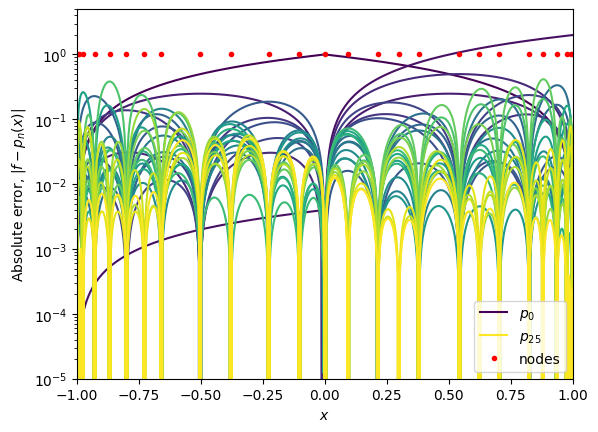

In [79]:
import numpy as np
import scipy.interpolate as sciint
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

def greedy_interp(f, n = 25, N = 500):
    """
    Interpolates the function f on [-1, 1] via a "greedy" algorithm:
    1. x0 is set as the point where |f| takes its maximum
    2. p_0, a polynomial that goes through x0, f(x0) is computed via barycentric interpolation 
    3. x1 is set as the point where |f - p_0| takes its maximum
    4. This is repeated until p_n is reached.
    The function computes the error of each interpolating polynomial on an evenly spaced, N-point grid.
    
    Parameters
    ----------
    f: callable
        Scalar-valued function of a single variable to interpolate.
    n: int (optional)
        The maximum degree of interpolating polynomial through f. Default is 25.
    N: int (optional)
        Number of points to compute the interpolation error at.
   
    Returns
    -------
    x: np.array<double>
        Array of selected interpolating nodes.
    xsamples: np.array<double> 
        Array of points where the error of the interpolating polynomials are evaluated.
    errs: np.array<double>
        An array of shape (n, N) containing the N interpolating errors of the n polynomials.
        
    """
    xsamples = np.linspace(-1, 1, N)
    errs = np.zeros((n + 1, N))
    x = []
    y = []
    xindex = np.argmax(np.abs(f(xsamples)))
    xi = xsamples[xindex]
    yi = f(xi)
    ysamples = sciint.barycentric_interpolate([xi], [yi], xsamples)
    errs[0, :] = np.abs(f(xsamples) - ysamples)
    x.append(xi)
    y.append(yi)
    for i in range(1, n + 1):
        xindex = np.argmax(errs[i - 1, :])
        xi = xsamples[xindex]
        yi = f(xi)
        x.append(xi)
        y.append(yi)
        ysamples = sciint.barycentric_interpolate(x, y, xsamples)
        errs[i, :] = np.abs(f(xsamples) - ysamples)
    return x, xsamples, errs
        

def test_greedy_interp():
    """
    Polynomials of degree n should be interpolated exactly with n + 1 nodes\
    (corresponding to n = n given to greedy_interp).
    """
    x, xsamples, errs = greedy_interp(lambda x: x**2, n = 2)
    assert max(errs[-1, :]) < 1e-15

test_greedy_interp()
f = lambda x: np.abs(x)                         
x, xerrs, errs = greedy_interp(f)

cmap = matplotlib.colormaps['viridis']
colors = cmap(np.linspace(0, 1, 26))

plt.figure()
for i, color in enumerate(colors):
    if i == 0 or i == 25:
        plt.semilogy(xerrs, errs[i, :], label = '$p_{'+'{}'.format(i)+'}$', color = color)
    else:
        plt.semilogy(xerrs, errs[i, :], color = color)

plt.plot(x, np.ones_like(x), '.', color = 'red', label = "nodes")
plt.xlabel("$x$")
plt.ylabel("Absolute error, $|f - p_n(x)|$")
plt.xlim((-1, 1))
plt.ylim((1e-5, 5e0))
plt.legend()
plt.show()

Notice how the nodes tend to cluster at $\pm 1$, just like Chebyshev nodes (a nice answer included a comparison!)

## 4. 

This exercise is about getting you to think of ways to estimate the condition number of a problem when its output(s) is not available as a closed form function of the input(s). We start with solving an IVP numerically and performing a convergence test (always required in practice) to estimate the accuracy of the solution.

### a) and b)

See my code below for solving the IVP and the convergence test. Note how I reversed the limits on the x-axis to go from higher to lower tolerance (this is custom in applied math papers). An upper bound on the error of the last iteration is the difference between that and the previous iteration's answer (you could also extrapolate). 

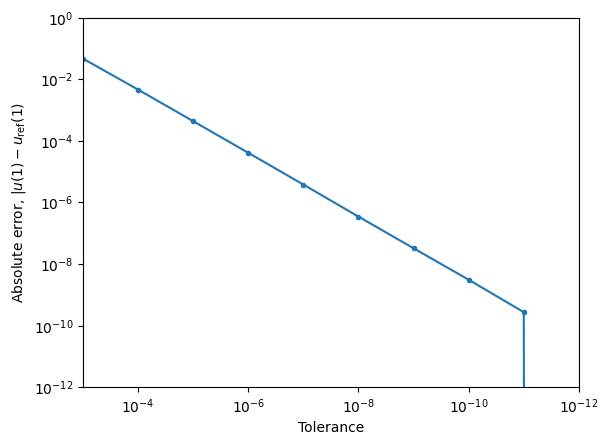

In [86]:
import scipy.integrate as sciintg

l = 100.0
# Helper function to encode time-dependent part of the frequency
g = lambda t: 1- t**2*np.cos(3*t)
# Right-hand-side of the ODE
f = lambda t, y: np.array([y[1], -y[0]*l**2*g(t)])
t0 = -1.0
tf = 1.0
t_span = (t0, tf)
y0 = np.array([0.0, l])

n = 10
us = np.zeros(n)
rtols = np.logspace(-3, -12, n)
for i, rtol in enumerate(rtols):
    solution = sciintg.solve_ivp(f, t_span, y0, rtol = rtol, atol = rtol)
    us[i] = solution.y[0,-1]

plt.figure()
plt.loglog(rtols, np.abs(us - us[-1]), '.-')
plt.xlabel("Tolerance")
plt.ylabel("Absolute error, $|u(1) - u_{\mathrm{ref}}(1)$")
plt.xlim((1e-3, 1e-12)) 
plt.ylim((1e-12, 1e0))
plt.show()

### c)

The first, quite reliable way of estimating the condition number is by direct measurement, i.e. by perturbing the input parameter(s) and seeing how the output changes. We try that with the $t_f$ parameter. If you plotted the solution, you'll have seen that it is oscillatory, and from the ODE you can read off that the local frequency is 

$$ \omega(t) = \lambda \sqrt{q(t)}. $$

We can therefore use the $\kappa_{x}$ from question 1 a) as an alternative way to estimate the condition number. 
Below I compute a "point estimate" of $\kappa_{t_f}$ with the direct measurement method, but a more thorough check is to vary the perturbation itself, like in Jonathan's solution.

In [88]:
tf1 = 1.0
tf2 = tf1 + 1e-10
t_span1 = (t0, tf1)
t_span2 = (t0, tf2)

solution1 = sciintg.solve_ivp(f, t_span1, y0, rtol = 1e-8, atol = 1e-8)
y1 = solution1.y[0,-1]

solution2 = sciintg.solve_ivp(f, t_span2, y0, rtol = 1e-8, atol = 1e-8)
y2 = solution2.y[0, -1]

kappa1 = np.abs((y1 - y2)/y1/((tf1 - tf2)/tf1))
print("Rel. condition number with direct measurement: ", kappa1)
print("Rel. condition number with theoretical estimate: ", tf1*l*np.sqrt(g(tf1)))

Rel. condition number with direct measurement:  125.87096645485708
Rel. condition number with theoretical estimate:  141.06709384546227


They are the same order of magnitude!

### d) 

This part walked you through "A crude practical estimate of the condition number" in Chapter 12 of Corless & Fillion's "A Graduate Introduction to Numerical Methods". The idea is that the residual,

$$ \Delta(t) := u' - f(t, u)$$

expresses the _backward error_. You can see that from rearranging its definition to

$$ u' = f(t, u) + \Delta(t) := \tilde{f}(t, u), $$

and noticing that $\Delta(t)$ quantifies is how different the problem is that we found the numerical solution to from the original problem.
$f(t, u)$, the right-hand-side, is one of the input parameters of the IVP, therefore $||\tilde{f}(t, u) - f(t, u)||_{L_{\infty}} = || \Delta(t) ||_{L_{\infty}}$ is the perturbation of the input that leads to the observable _forward error_ $|| u - \tilde{u}||$. (Here, $u$ is the exact solution, but we are using the lower tolerance result as an estimate of it, and $\tilde{u}$ is the solution obtained with the looser tolerance setting). Their ratio is the (absolute) condition number. 

To compute the condition number this way, we need to accurately estimate the residual, which in turn requires a numerical estimate of $\tilde{u}'$ from $\tilde{u}$. Note that low-order finite differencing is not going to cut it as it will introduce an error larger than the tolerance we set and "contaminate" the residual. You were expected to check the accuracy of this numerical estimate by e.g. convergence testing, see below:

In [302]:
def chebD(n):
    """
    Computes the (n+1)x(n+1) spectral differentiation matrix\
    using Chebyshev roots according to Ch 6 of Trefethen's\
    "Spectral methods in MATLAB". Returns D and nodes on [-1, 1].
    Note that they are ordered backwards, i.e. 1 to -1!
    """
    if n == 0:
        x = 1; D = 0; w = 0
    else:
        a = np.linspace(0.0, np.pi, n+1)
        x = np.cos(a)
        b = np.ones_like(x)
        b[0] = 2; b[-1] = 2
        d = np.ones_like(b)
        d[1::2] = -1
        c = b*d
        X = np.outer(x, np.ones(n+1))
        dX = X - X.T
        D = np.outer(c, 1/c) / (dX + np.identity(n+1))
        D = D - np.diag(D.sum(axis=1))
    return D, x

f = lambda t, u: np.array([u[0]**2 - t])
t0 = 0
tf = 5
t_span = (t0, tf)
u0 = np.array([-0.5])

# Try Chebyshev nodes with n = 128 and n = 256, so that the n = 128 nodes are present in both. 
# Compare estimates of u' at those nodes to estimate the error in interpolation.

n = 60
D1, x1 = chebD(n)
D2, x2 = chebD(n*2)
x1_scaled = x1*(tf - t0)/2 + (tf + t0)/2
x2_scaled = x2*(tf - t0)/2 + (tf + t0)/2
# Order nodes from t0 to tf, increasing order
x1_scaled = np.flip(x1_scaled)
x2_scaled = np.flip(x2_scaled)

In [303]:
solution = sciintg.solve_ivp(f, t_span, u0, rtol = 1e-8, atol = 1e-8, t_eval = x1_scaled)
solution2 = sciintg.solve_ivp(f, t_span, u0, rtol = 1e-8, atol = 1e-8, t_eval = x2_scaled)
u_arr1 = solution.y[0]
u_arr1 = np.flip(u_arr1)
u_arr2 = solution2.y[0]
u_arr2 = np.flip(u_arr2)
# U arrays are now in decreasing order

up_arr2 = 2/(tf - t0)*(D2 @ u_arr2)
up_arr1 = 2/(tf - t0)*(D1 @ u_arr1)
# Up arrays also in decreasing order

up_arr1star = sciint.barycentric_interpolate(x2, up_arr2, x1)
err = np.abs((up_arr1 - up_arr1star))
print(max(err))

4.74575154674195e-07


In [304]:
t_arr2 = solution2.t
up_arr2 = np.flip(up_arr2)
u_arr2 = np.flip(u_arr2)
# Now t, u, up all in increasing order

relres = max(np.abs((up_arr2 - (u_arr2**2 - t_arr2))/u_arr2))
absres = max(np.abs((up_arr2 - (u_arr2**2 - t_arr2))))
print("Maximum absolute residual: ", absres)

solution3 = sciintg.solve_ivp(f, t_span, u0, rtol = 1e-10, atol = 1e-10, t_eval = x2_scaled)
u_arr3 = solution3.y[0]
durel = max(np.abs((u_arr3 - u_arr2)/u_arr2))
duabs = max(np.abs((u_arr3 - u_arr2)))
print("Maximum forward error: ", duabs)
kappa_rel = durel/relres
kappa_abs = duabs/absres
print(kappa_rel, kappa_abs)

Maximum absolute residual:  8.572814806373508e-07
Maximum forward error:  1.6739423458478342e-08
0.01932826552097918 0.019526169451407397
